![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

# Classification
## Decision Tree

### Bemorga dori tavsiya qilish tizimi

Tasavvur qiling, siz tadqiqot uchun ma'lumot to'playotgan tibbiy tadqiqotchisiz. Siz bir xil kasallikdan aziyat chekkan bemorlar haqida ma'lumot to'pladingiz. Davolash kursi davomida bemorlarga 5 xil doridan biri ijobiy ta'sir qildi.

Sizning vazifangiz, xuddi shu kasallik bilan kasallangan kelajakdagi bemorga qaysi dori mos kelishi mumkinligini aniqlaydigan model yaratish. Ushbu muammo ko'p toifali klassifikator (multiclass classification) yordamida xal qilinadi.

Model yaratish uchun Decision Tree algoritmidan foydalanamiz.

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

Ustunlar:
- `Age` - yosh
- `Sex` - jins
- `BP` - qon bosimi
- `Cholesterol` - qondagi xolesterol
- `Na_to_K` - organizmdagi natriy miqdorining kaliyga nisbati

In [4]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
88,37,F,HIGH,NORMAL,23.091,drugY
125,19,F,HIGH,NORMAL,25.969,drugY
16,69,M,LOW,NORMAL,11.455,drugX
64,60,F,HIGH,HIGH,13.303,drugB
181,59,F,NORMAL,HIGH,13.884,drugX
39,15,M,NORMAL,HIGH,9.084,drugX
25,28,F,HIGH,NORMAL,18.809,drugY
60,38,F,LOW,NORMAL,29.875,drugY
126,66,M,HIGH,HIGH,16.347,drugY
55,26,F,LOW,HIGH,14.160,drugC


Matnli ustunlarga ishlov beramiz

In [5]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
38,39,0,2,1,9.709,drugX
128,47,1,1,1,33.542,drugY
17,43,1,0,0,13.972,drugA
101,45,0,0,0,12.854,drugA
95,36,1,1,1,11.424,drugX
45,66,0,2,1,8.107,drugX
161,57,0,0,1,9.945,drugB
96,58,0,1,0,38.247,drugY
152,55,1,2,1,7.261,drugX
32,49,1,1,1,11.014,drugX


`X` va `y` ni ajratib olamiz

In [6]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [7]:
y = df['Drug'].values

### Train/test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

### Model

In [9]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Baholash

In [10]:
y_predict = tree_model.predict(X_test)

In [11]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [13]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

NameError: name 'accuracy_score' is not defined

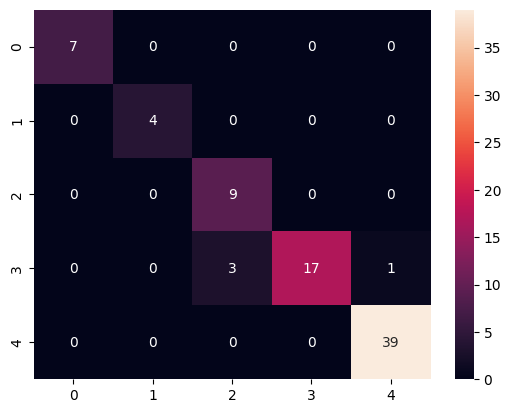

In [14]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

**Cross-validation**

In [15]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



## Decision Tree chizamiz

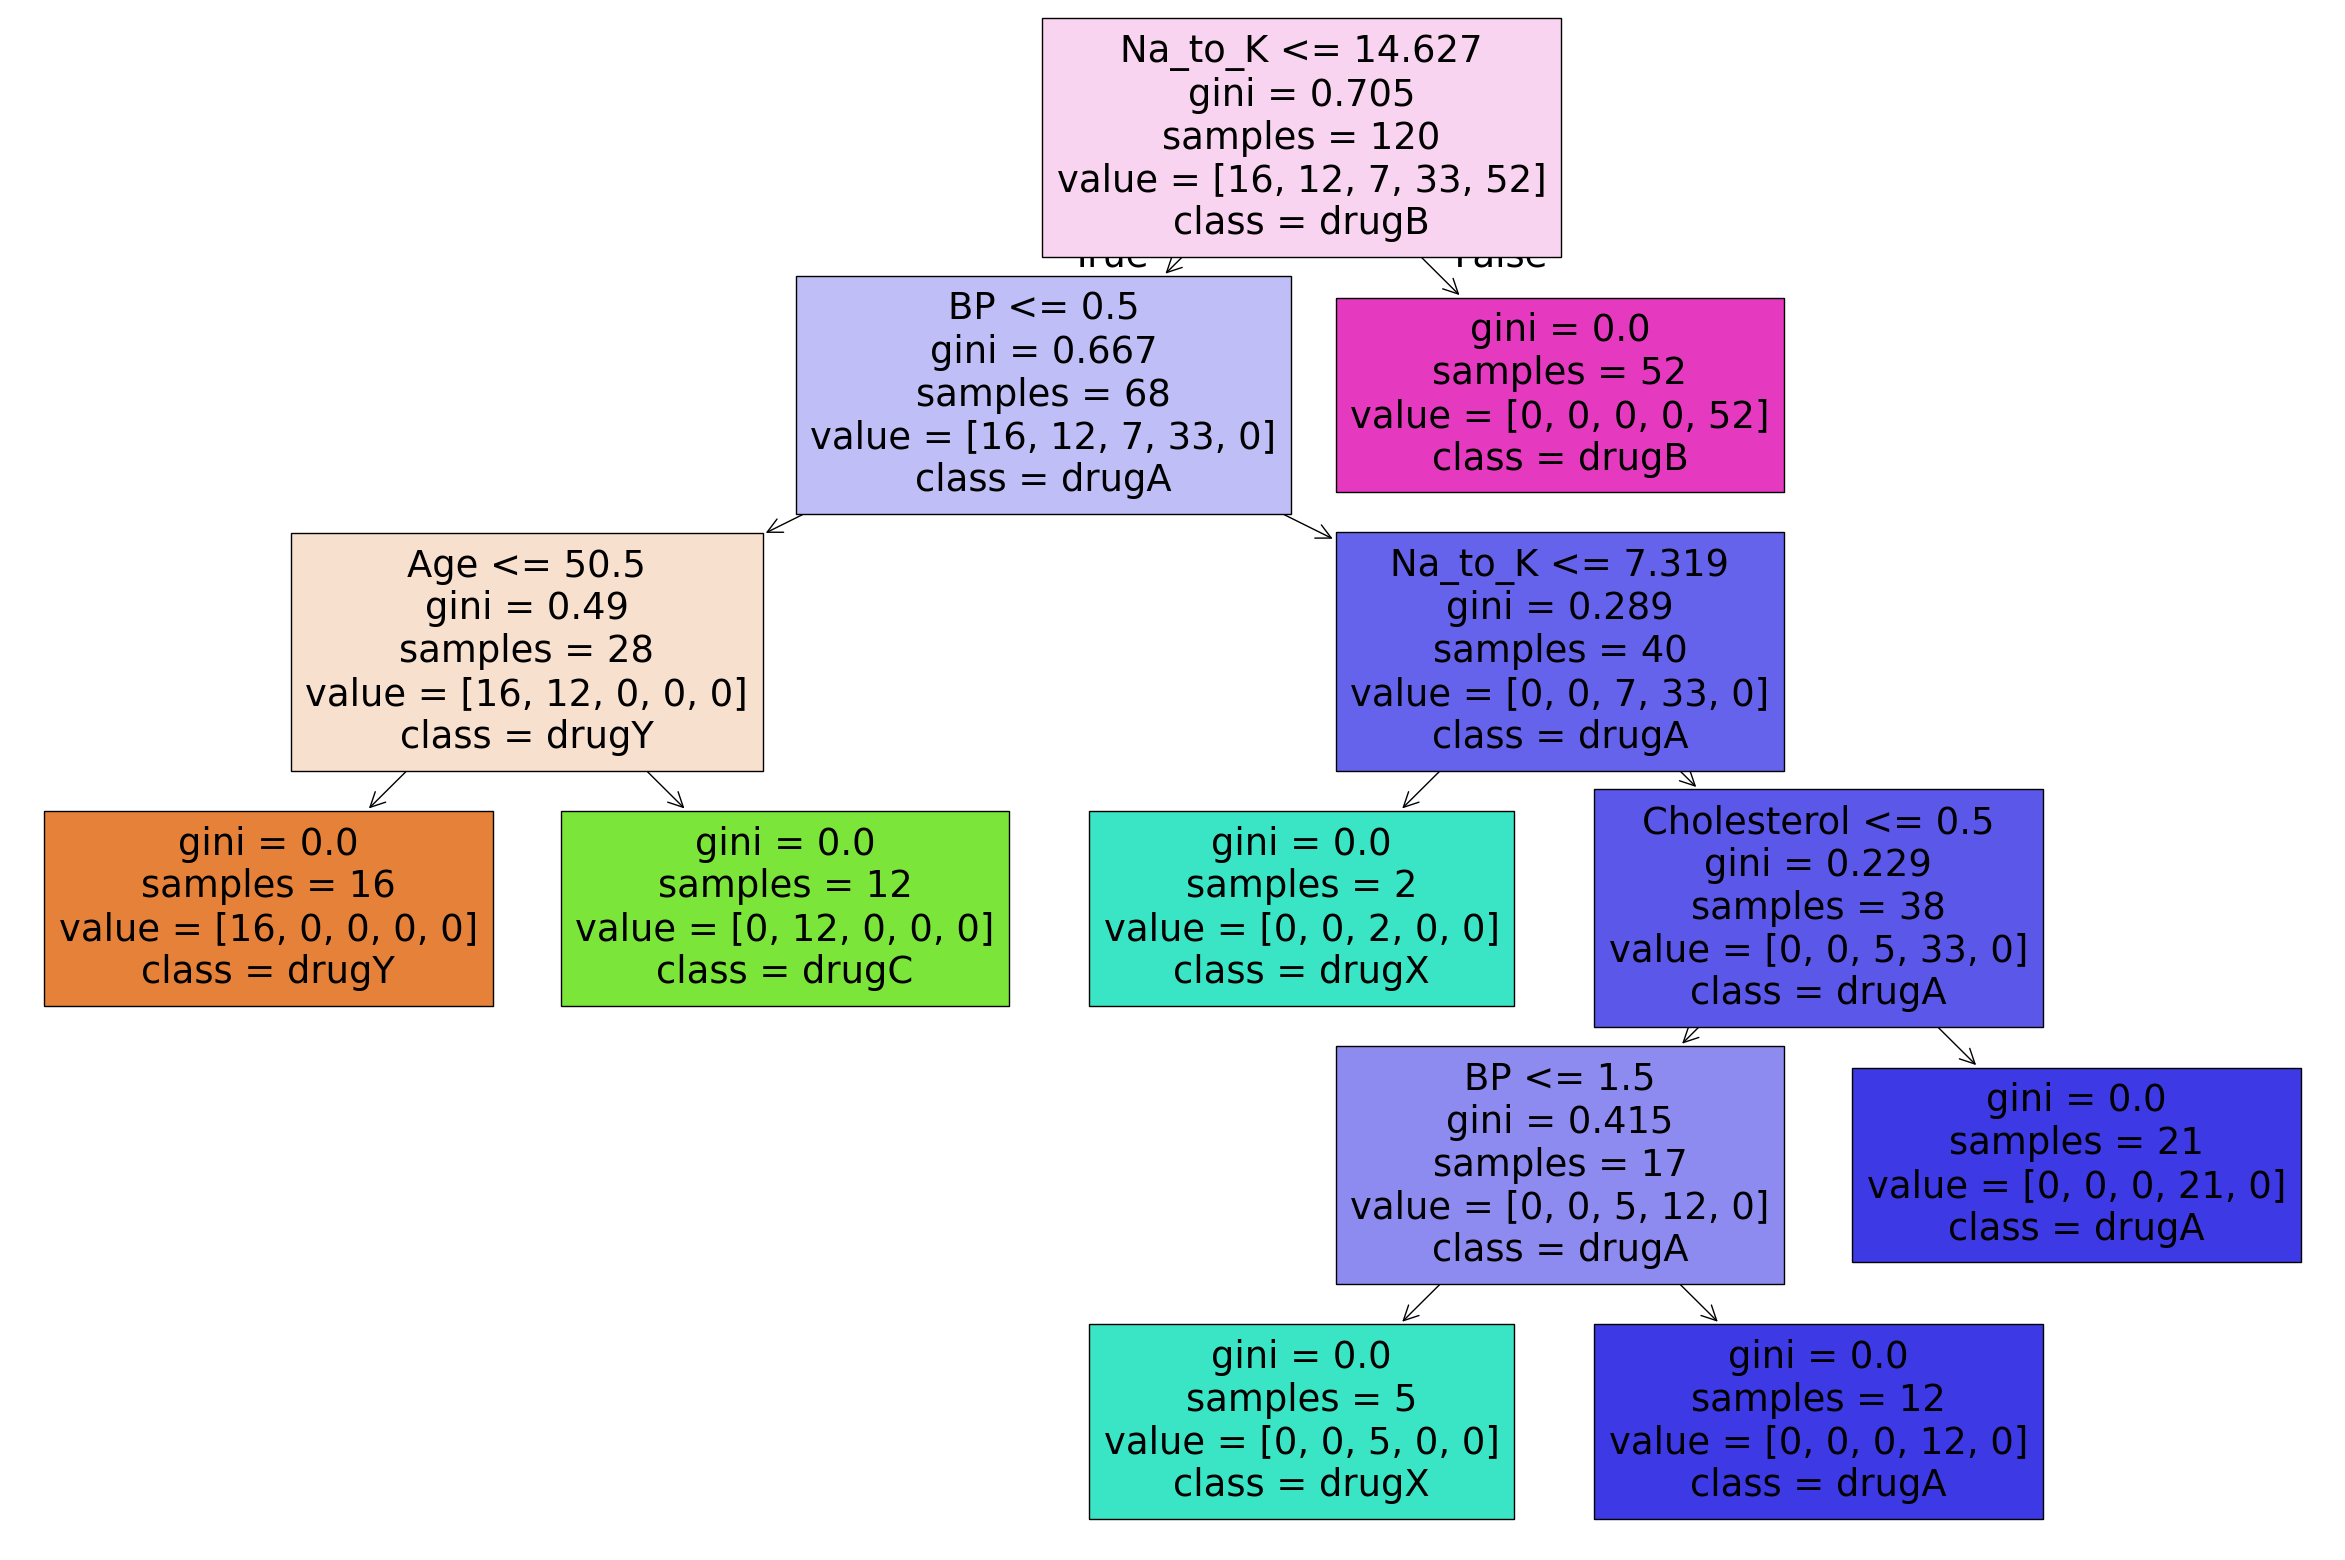

In [17]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

# Hyperparameters

Har bir model o'ziga xos giperparametrlar bilan keladi, biz bu parametrlarni sozlash orqali model aniqligini yoki tezligini oshirishimiz mumkin.

k-NN uchun bu `k` ya'ni qo'shnilar soni edi. Decision Treen da esa bir nechta giperparametrlar mavjud. Barcha parametrlarni ushbu link orqali ko'rishingiz mumkin: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**`min_impurity_decrease'** - natija qanchalik "toza" bo'lishini belgilaydi. Standart qiymati 0

In [18]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

NameError: name 'metrics' is not defined

**`max_depth`** - shajara qavatlari soni

In [19]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

NameError: name 'metrics' is not defined

**`min_samples_leaf`** - leaf node (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

In [20]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

NameError: name 'metrics' is not defined

## Random Forest

[Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
- `n_estimators` - o'rmondagi daraxtlar soni.


In [22]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       0.80      1.00      0.89         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      1.00      1.00        21
       drugY       1.00      0.97      0.99        39

    accuracy                           0.99        80
   macro avg       0.96      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9375
